# Part 1: PCA and Variance Threshold in a Linear Regression

### 1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [1]:
# load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load training dataset
df = pd.read_csv('Datasets/train.csv')

In [3]:
# viewing first 5 rows
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking the shape of the dataframe 
df.shape

(1460, 81)

### 2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [5]:
# dropping 'id' column
df = df.drop(['Id'], axis=1)

In [6]:
# counting NaN or null values
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [7]:
# getting the percentage of nan values per column
percent_missing = df.isnull().sum() * 100 / len(df) # len(df) should be the number of rows
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}) # creating a dataframe of the column name with the percentage of missing values
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False) # sorting them descending 

In [8]:
# filtering the missing_value_df by per columns that are missing more than 40%
missing_value_df[missing_value_df['percent_missing'] > 40] 

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
MasVnrType,MasVnrType,59.726027
FireplaceQu,FireplaceQu,47.260274


In [9]:
# dropping columns that have 40% or more missing values
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)

In [10]:
# viewing the shape of the dataframe
df.shape

(1460, 74)

### 3. For numerical columns, fill in any missing data with the median value.

In [11]:
# view the remaining columns with NaN values
number_missing = df.isnull().sum().sort_values(ascending=False)
number_missing

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
MSZoning          0
SalePrice         0
Length: 74, dtype: int64

In [12]:
# filling numeric coulmns with their median values
df.fillna(df.median(numeric_only = True), inplace=True)

### 4. For categorical columns, fill in any missing data with the most common value (mode).

In [13]:
# checking the remaining columns with NaN values
df.isnull().sum().sort_values(ascending=False) 

GarageType      81
GarageCond      81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
                ..
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
SalePrice        0
Length: 74, dtype: int64

In [14]:
# creating a for loop to loop over all columns and fill NaN values with the mode, since the numeric values 
# were done first and shoould have no NaN, this should only apply to the 'object' or category types
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [15]:
# verifying there are no longer any NaN values
df.isnull().sum().sort_values(ascending=False) 

MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
ExterQual       0
MasVnrArea      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 74, dtype: int64

### 5. Convert the categorical columns to dummy variables.

In [16]:
# using get_dummies, with the parameter being df it should only apply to catigorical columns. 
df_dumb = pd.get_dummies(df, dtype=int, drop_first = True) # by default, get_dummies() returns boolean, data type specified

In [17]:
df_dumb.shape

(1460, 230)

### 6. Split the data into a training and test set, where the SalePrice column is the target.

In [18]:
# importing additional libraries
from sklearn.model_selection import train_test_split

In [19]:
X = df_dumb.drop(columns=['SalePrice']) # Features
y = df_dumb.SalePrice # Target variable

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

### 7. Run a linear regression and report the R2-value and RMSE on the test set.

In [21]:
# importing additional tools 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
# create the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# creating predictions from the trained model
predictions = model.predict(X_test)

In [24]:
# calculating r-sqaured value
r2_score = model.score(X_test, y_test)
print(f"R-squared value: {r2_score}")

R-squared value: 0.7268673122394542


In [25]:
# calculating RMSE
sqrt(mean_squared_error(y_test, predictions))

43657.13577836329

*Although the RMSE is large, it is actually quite small in regards to the values being predicted. The RMSE represents $44,000 difference betweeen the actual values, which are in the hundreds of thousands.* 

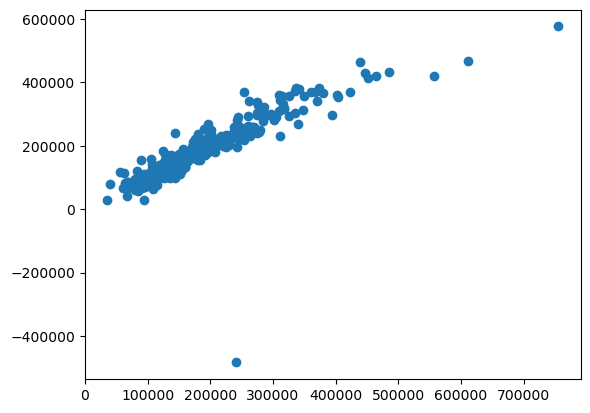

In [26]:
# plotting the predictions to visualize the model
plt.scatter(y_test, predictions)
plt.show()

### 8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [27]:
# importing additional tools 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# using the scaler on the training features
X_train_sc = scaler.fit_transform(X_train)

In [28]:
# importing additional tools
from sklearn.decomposition import PCA

In [29]:
# conducting PCA to the training data
pca = PCA(n_components=0.9, whiten=True)
X_pca = pca.fit_transform(X_train_sc)

In [30]:
print(f"Original number of features: {X_train.shape[1]}")
print(f"Original number of features: {X_pca.shape[1]}")

Original number of features: 229
Original number of features: 122


### 9. How many features are in the PCA-transformed matrix?

In [31]:
print(f" There are {X_pca.shape[1]} features in the PCA transformed matrix")

 There are 122 features in the PCA transformed matrix


### 10. Transform but DO NOT fit the test features with the same PCA.

In [32]:
# transforming the test data using the PCA
X_pca_test = pca.transform(X_test)

C:\Users\rbrio\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


### 11. Repeat step 7 with your PCA transformed data.

In [33]:
# create the model with the new PCA features
model.fit(X_pca, y_train)

LinearRegression()

In [34]:
# creating predictions with the PCA data
predictions_pca = model.predict(X_pca_test)

In [35]:
# calculating r squared
r2_score = model.score(X_pca_test, y_test)
print(f"R-squared value: {r2_score}")

R-squared value: -536774.8822190069


In [36]:
# calculating RMSE
sqrt(mean_squared_error(y_test, predictions_pca))

61201898.947133526

*I feel that I must have done something incorrect here*

### 12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [37]:
# importing additional tools 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [38]:
X_train_mm = min_max_scaler.fit_transform(X_train)

### 13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [39]:
# importing additional tools 
from sklearn.feature_selection import VarianceThreshold

In [40]:
# creating the variance thresholder
thresholder = VarianceThreshold(threshold=0.1)

In [41]:
X_high_variance_train = thresholder.fit_transform(X_train_mm)

### 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [42]:
X_test_mm = min_max_scaler.transform(X_test)

In [43]:
X_high_variance_test = thresholder.transform(X_test_mm)

### 15. Repeat step 7 with the high variance data.

In [44]:
# create the linear regression model
model = LinearRegression()
model.fit(X_high_variance_train, y_train)

LinearRegression()

In [45]:
# creating predictions with the PCA data
predictions_hvd = model.predict(X_high_variance_test)

In [46]:
# calculating r squared
r2_score = model.score(X_high_variance_test, y_test)
print(f"R-squared value: {r2_score}")

R-squared value: 0.6444871362922306


In [47]:
# calculating RMSE
sqrt(mean_squared_error(y_test, predictions_hvd))

49807.650980274615

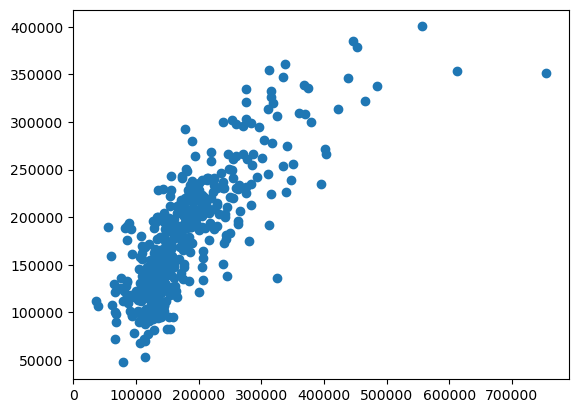

In [48]:
# plotting the predictions to visualize the model
plt.scatter(y_test, predictions_hvd)
plt.show()

### 16. Summarize your findings.

Part one of the assignment can be broken into several different main parts. The first is running a linear regression model using the original train and test sets of data. This resulted in an RMSE of 43657.13, this appears to reflect a dollar error between actual and predicted values. The r-squared value was 0.73, which indicates the model is a decent fit for the data. 

When fitting and transforming the PCA to the training data, the features were reduced from 229 to 122 features. Running the linear regression model with the new PCA training set the r-squared value was an unreasonably large negative number, while the RMSE was unreasonable large positive number. I realize this must be an error but have been unable to find what is causing the error at this time. 

When using the min-max scaled training data the linear regression model appeared to perform well again. The r-squared value returned was 0.64 indicates a slight decrease in performance compared to the original training data. The RMSE returned was 49807.65 which is larger than the RMSE from the original dataset. This further indicates that the original model perforsmed lightly better. 


# Part 2: Categorical Feature Selection

### 1. Import the data as a data frame and ensure it is loaded correctly.

In [49]:
shroom = pd.read_csv('Datasets\mushrooms.csv')

In [50]:
shroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2. Convert the categorical features (all of them) to dummy variables.

In [51]:
# using get_dummies, with the parameter being df it should only apply to catigorical columns. 
dumb_shrooms = pd.get_dummies(shroom, dtype=int, drop_first = True) # by default, get_dummies() returns boolean, data type specified

In [52]:
# viewing first 5 rows
dumb_shrooms.head(5)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 3. Split the data into a training and test set.

In [53]:
X = dumb_shrooms.drop(columns=['class_p']) # Features
y = dumb_shrooms.class_p # Target variable

In [54]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### 4. Fit a decision tree classifier on the training set.

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [56]:
# Creating Decision Tree classifer object
clf = DecisionTreeClassifier()

In [57]:
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

In [58]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [59]:
# Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_pred)

### 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [60]:
# viewing accuracy 
accuracy

1.0

### 6. Create a visualization of the decision tree.

In [61]:
# importing additonal tools 
from sklearn import tree

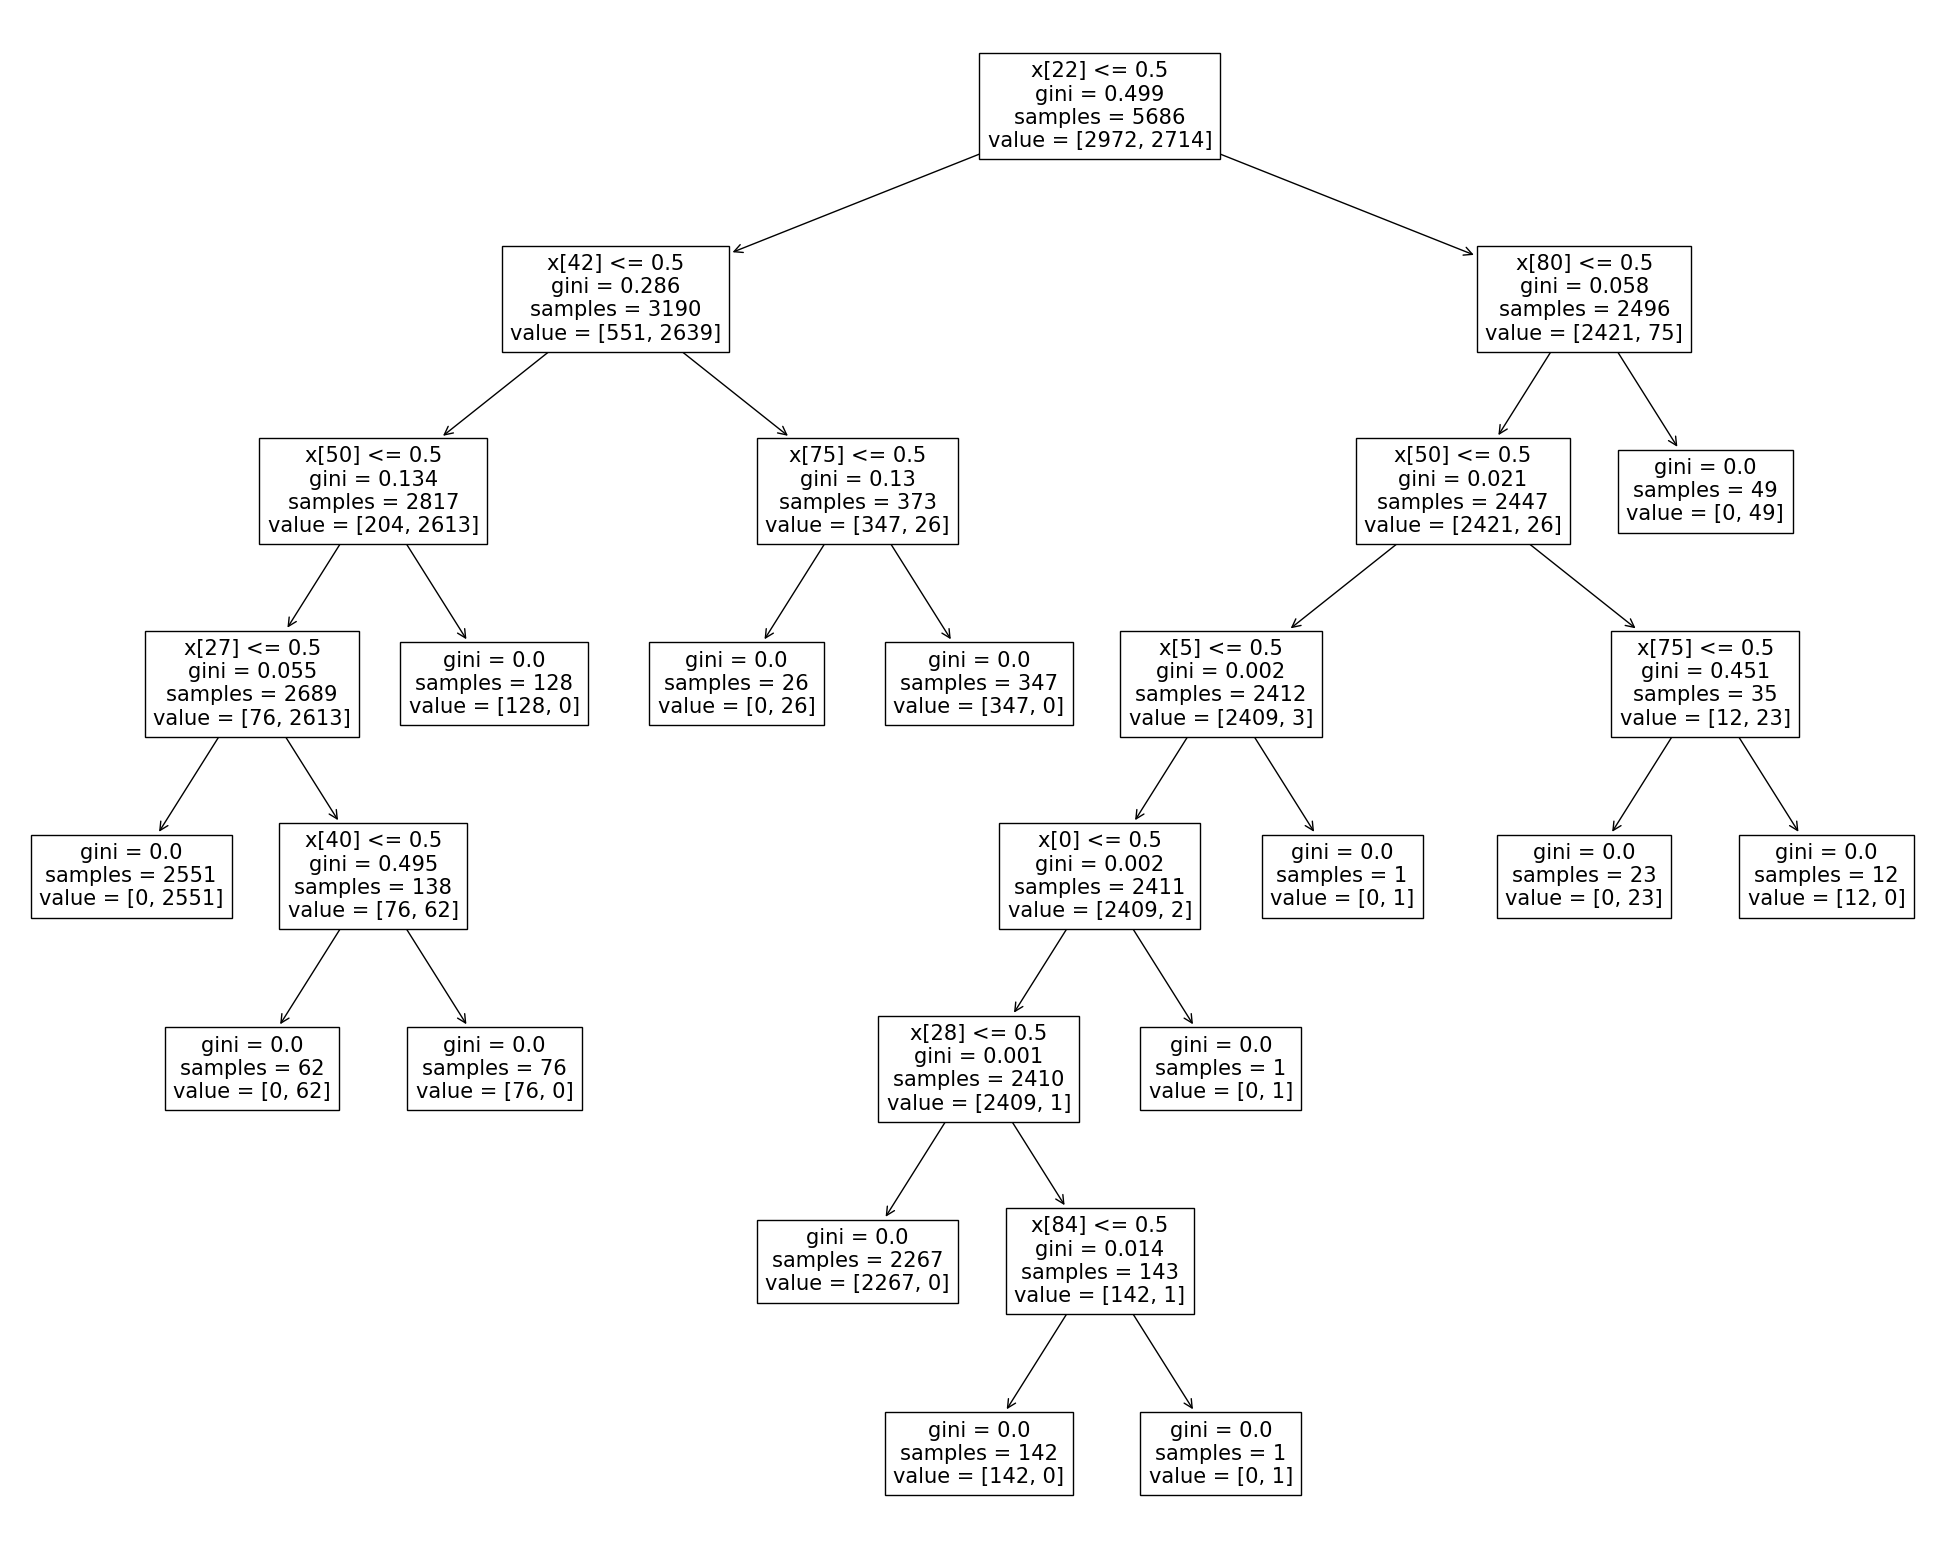

In [62]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

### 7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [64]:
# finding the 5 best features using chi2
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(X, y)

### 8. Which five features were selected in step 7? Hint: Use the get_support function.

In [65]:
# viewing the names of the columns selected
kbest = np.asarray(X_train.columns)[chi2_selector.get_support()]
kbest

array(['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'], dtype=object)

### 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [66]:
# Split dataset again using the 5 best features into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_kbest, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [67]:
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

In [68]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [69]:
# Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9790812141099262

### 10. Summarize your findings.

Running the decision tree with the original training data (after converting the categorical value using dummies), the accuracy score returned was 100%. After applying the Chi-squared feature selection to the training data, 5 features were selected. Using only the five features selected, a new linear regression model was run. The accuracy on the new model returned as roughly 98%, which indicates a great model, but still underperforms the 100% accuracy of the original model.